In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
app_train=pd.read_csv('Data frame merge_HW_013/application_train.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:

app_train.groupby(['CNT_CHILDREN']).size()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
dtype: int64

In [52]:
kid_r=[-np.inf,0,2,5,20]
app_train['CNT_CHILDREN_GROUP']=pd.cut(app_train['CNT_CHILDREN'].values,kid_r,include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-inf, 0.0]    215371
(0.0, 2.0]      87868
(2.0, 5.0]       4230
(5.0, 20.0]        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [53]:
app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL'].mean()

CNT_CHILDREN_GROUP  TARGET
(-inf, 0.0]         0         166747.010980
                    1         160804.210548
(0.0, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, 20.0]         0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}, xlabel='[CNT_CHILDREN_GROUP, TARGET]'>

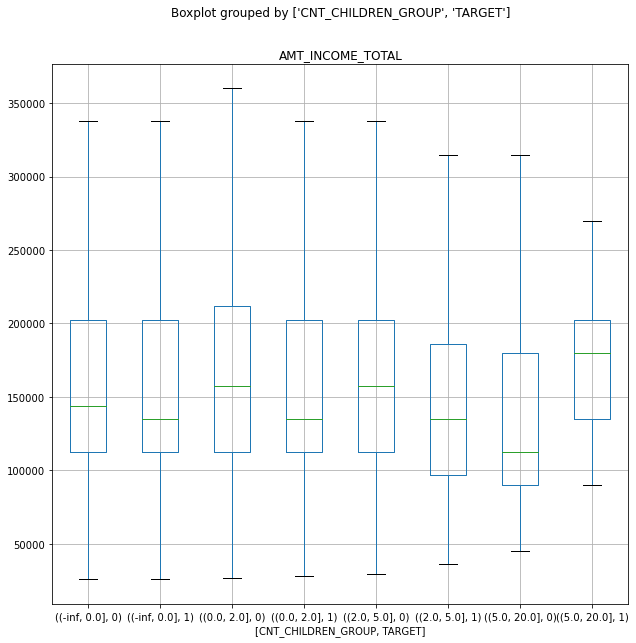

In [59]:
app_train.boxplot(column='AMT_INCOME_TOTAL',by=['CNT_CHILDREN_GROUP','TARGET'],showfliers=False, figsize=(10,10))

<AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}, xlabel='[CNT_CHILDREN_GROUP, TARGET]'>

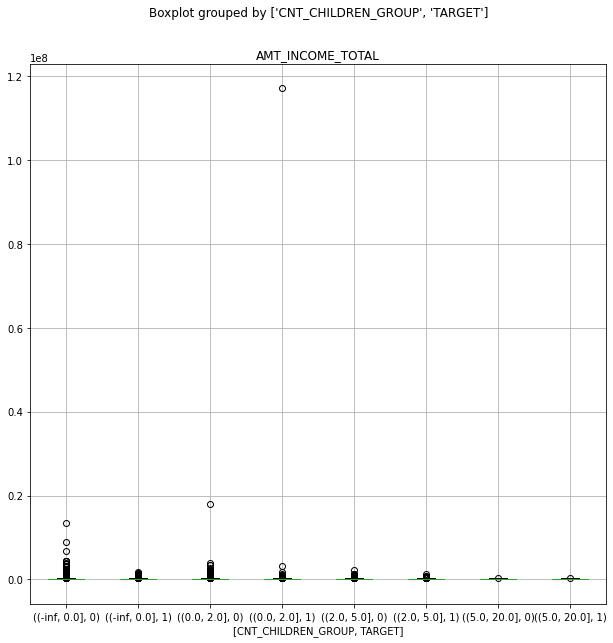

In [60]:
app_train.boxplot(column='AMT_INCOME_TOTAL',by=['CNT_CHILDREN_GROUP','TARGET'], figsize=(10,10))

In [63]:
group_data=app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL']
app_train['AMT_INCOME_TOTAL_Ztrans']=group_data.apply(lambda x: (x-np.mean(x))/np.std(x))
app_train[['AMT_INCOME_TOTAL_Ztrans','AMT_INCOME_TOTAL','CNT_CHILDREN_GROUP']].head()

,AMT_INCOME_TOTAL_Ztrans,AMT_INCOME_TOTAL,CNT_CHILDREN_GROUP
0,0.491536,202500.0,"(-inf, 0.0]"
1,0.972437,270000.0,"(-inf, 0.0]"
2,-0.934708,67500.0,"(-inf, 0.0]"
3,-0.298993,135000.0,"(-inf, 0.0]"
4,-0.426136,121500.0,"(-inf, 0.0]"
